In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df1 = pd.read_csv('data/냉간단조_데이터셋_unique1_drop.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579297 entries, 0 to 579296
Data columns (total 45 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    579297 non-null  int64  
 1   Timestamp                     579297 non-null  object 
 2   OUTPUT_COUNT_DAY_1            579297 non-null  float64
 3   KO6_MOTOR_SET_FREQ            579297 non-null  float64
 4   CUTTING_SET_FREQ              579297 non-null  float64
 5   STATUS                        579297 non-null  float64
 6   KO5_MOTOR_SET_FREQ            579297 non-null  float64
 7   METAL_OIL_SUPPLY_PRESS_CONTR  579297 non-null  float64
 8   KO4_MOTOR_SET_FREQ            579297 non-null  float64
 9   KO2_MOTOR_SET_FREQ            579297 non-null  float64
 10  MAIN_MOTOR_CURR               579297 non-null  float64
 11  KO3_MOTOR_SET_FREQ            579297 non-null  float64
 12  TRANS_POS_UP_SET_H            579297 non-nul

In [6]:
list_1 = ['OUTPUT_COUNT_SUM', 'OUTPUT_COUNT_DAY_1', 'OUTPUT_COUNT_DAY_2', 'STATUS',
          'OIL_SUPPLY_PRESS','WORK_OIL_SUPPLY_PRESS','METAL_OIL_SUPPLY_PRESS_CONTR','METAL_OIL_SUPPLY_PRESS_CUT']


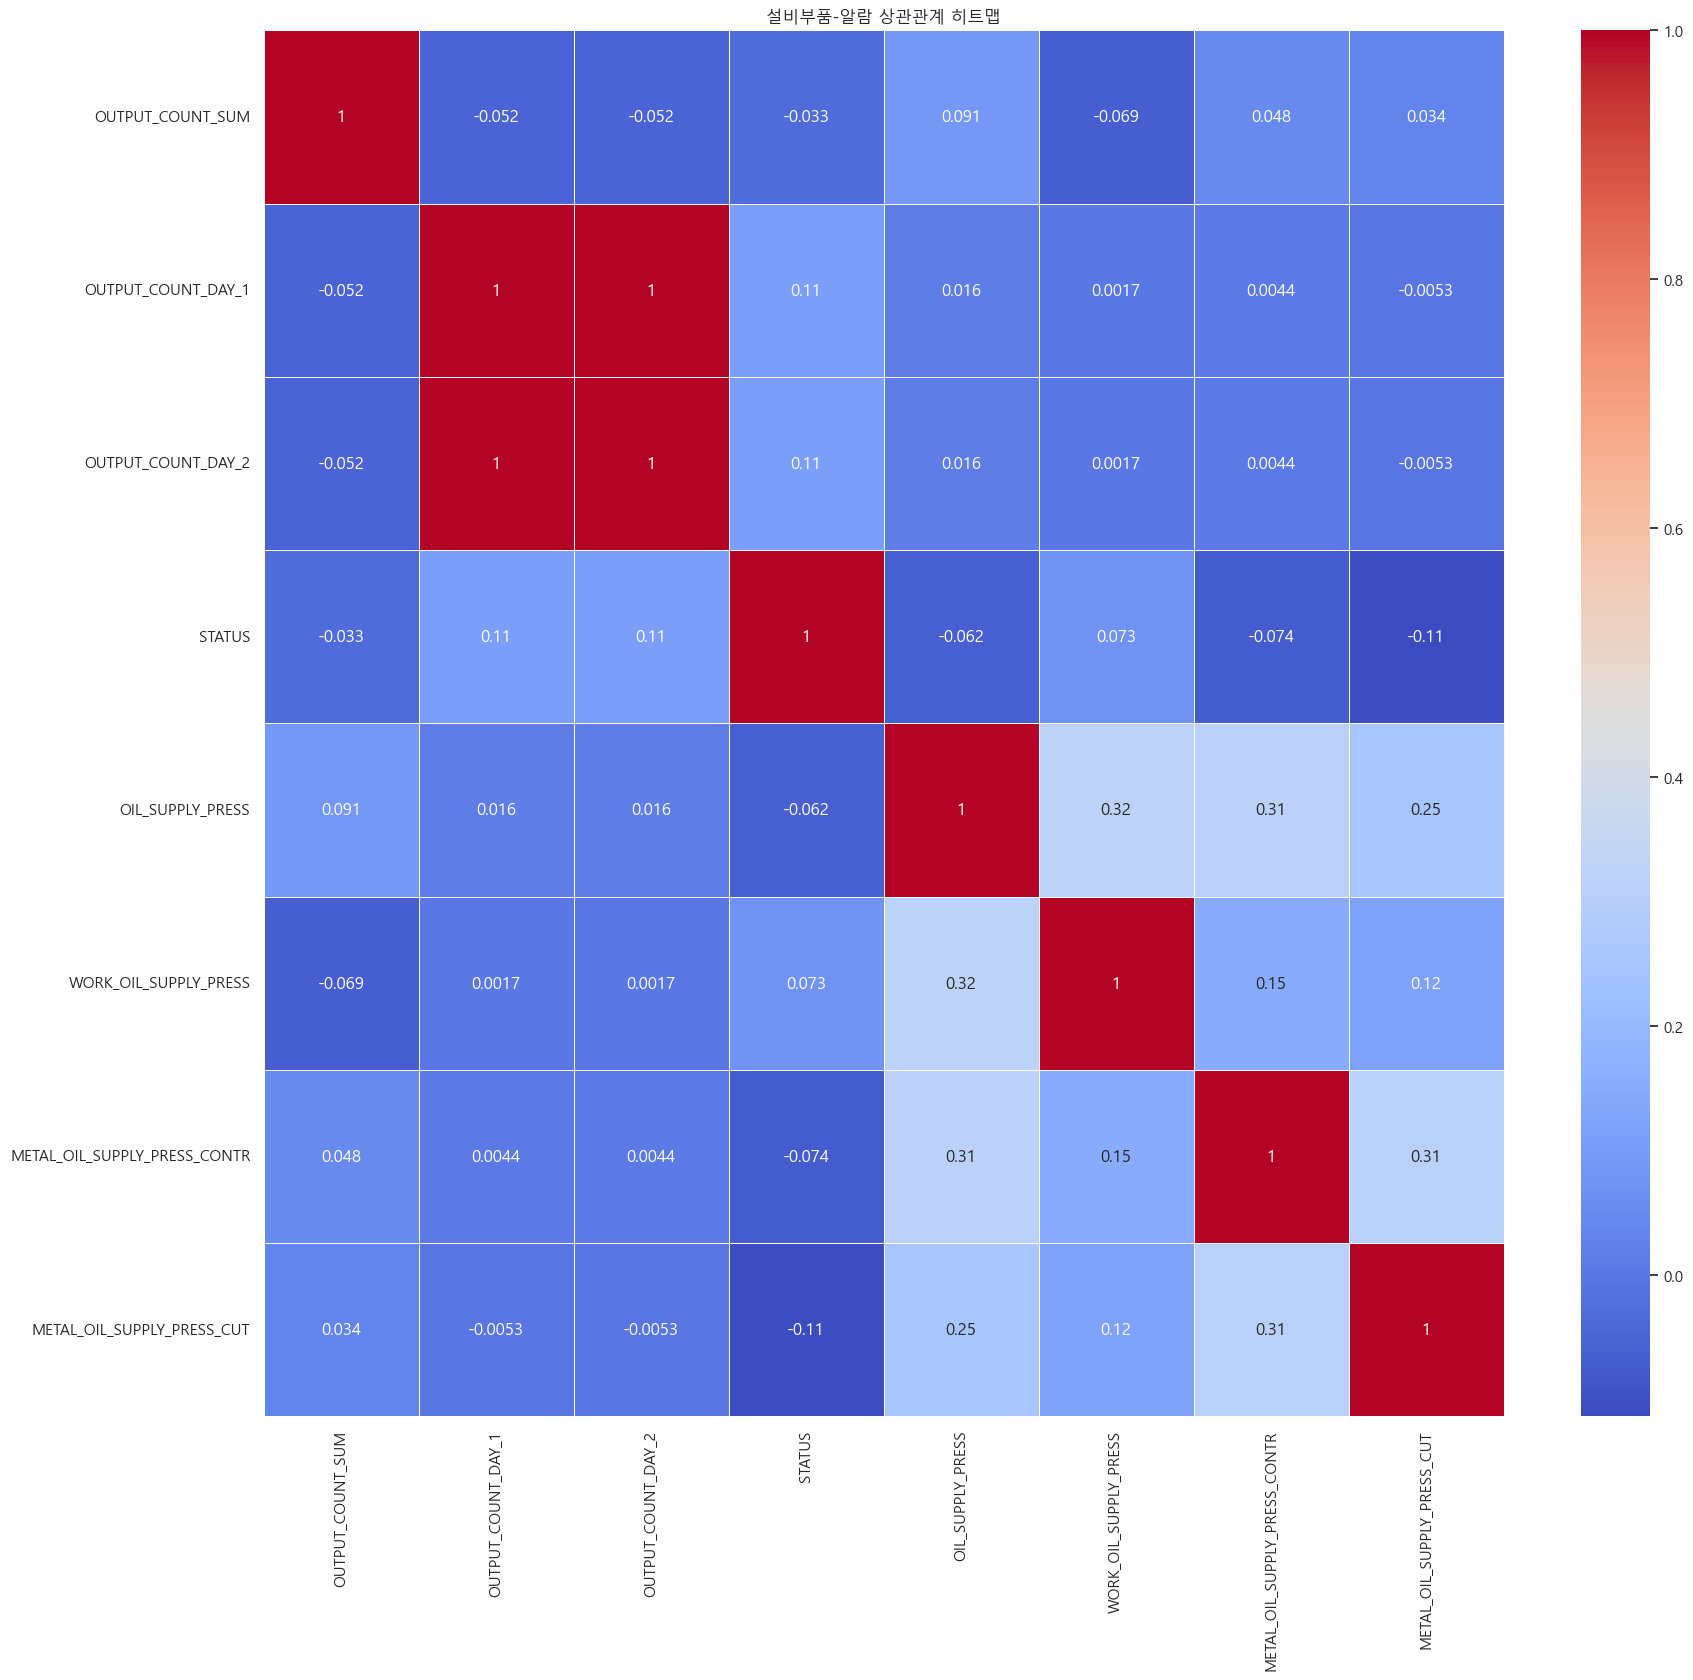

In [7]:
# 상관관계 행렬 계산
corr_matrix = df1[list_1].corr()

# 시각화 (옵션)
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 12} , linewidths=0.5,linecolor='white')
plt.title("설비부품-알람 상관관계 히트맵")
plt.show()

In [8]:
df1['OIL_SUPPLY_PRESS'].value_counts()

OIL_SUPPLY_PRESS
137.200    1586
452.000     227
249.000     222
254.000     213
388.000     209
           ... 
661.769       1
645.142       1
652.526       1
653.691       1
392.208       1
Name: count, Length: 28431, dtype: int64

In [11]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ eta squared 계산 함수
def eta_squared(data: pd.DataFrame, numeric_col: str, categorical_col: str) -> float:
    try:
        model = ols(f'{numeric_col} ~ C({categorical_col})', data=data).fit()
        anova_table = anova_lm(model, typ=1)
        ss_between = anova_table['sum_sq'][0]
        ss_total = anova_table['sum_sq'].sum()
        return ss_between / ss_total
    except Exception as e:
        print(f"⚠️ Error in {numeric_col}: {e}")
        return None

In [12]:
# ✅ 2. 사용 예시: 변수 설정
cat_col = 'STATUS'  # 범주형 변수
num_cols = ['OUTPUT_COUNT_SUM', 'OUTPUT_COUNT_DAY_1', 'OUTPUT_COUNT_DAY_2', 
          'OIL_SUPPLY_PRESS','WORK_OIL_SUPPLY_PRESS','METAL_OIL_SUPPLY_PRESS_CONTR','METAL_OIL_SUPPLY_PRESS_CUT']  # 수치형 변수 리스트

# ✅ 반복 계산 함수
def compute_eta_for_list(data: pd.DataFrame, cat_col: str, num_cols: list) -> pd.DataFrame:
    results = []
    for num_col in num_cols:
        eta = eta_squared(data, numeric_col=num_col, categorical_col=cat_col)
        if eta is not None:
            results.append((num_col, eta))
    result_df = pd.DataFrame(results, columns=['Numeric Variable', 'Eta Squared'])
    return result_df.sort_values(by='Eta Squared', ascending=False)

# ✅ 실행
eta_df = compute_eta_for_list(df1, cat_col, num_cols)
print(eta_df)

               Numeric Variable  Eta Squared
0              OUTPUT_COUNT_SUM     0.083001
1            OUTPUT_COUNT_DAY_1     0.015565
2            OUTPUT_COUNT_DAY_2     0.015556
6    METAL_OIL_SUPPLY_PRESS_CUT     0.013141
4         WORK_OIL_SUPPLY_PRESS     0.011286
5  METAL_OIL_SUPPLY_PRESS_CONTR     0.005562
3              OIL_SUPPLY_PRESS     0.004073


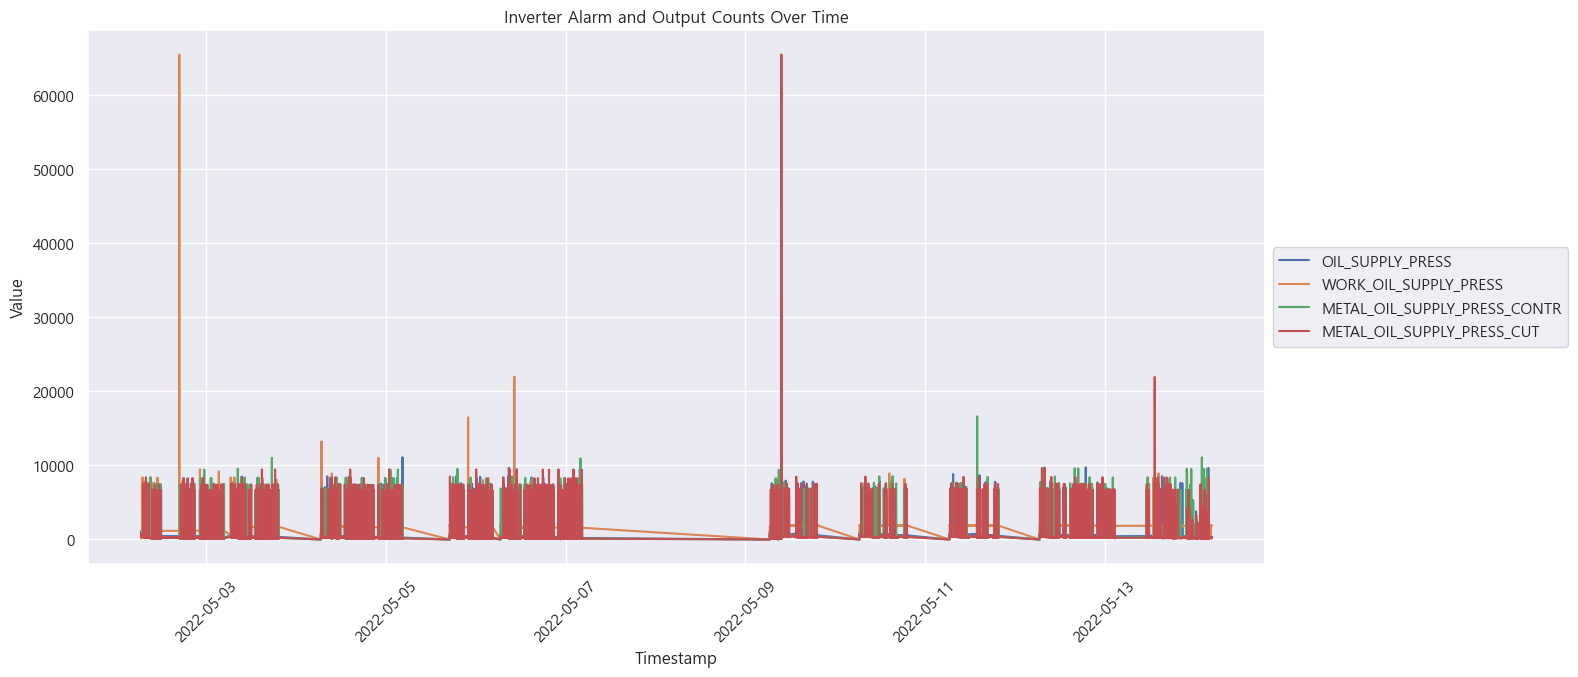

In [13]:
# ✅ 1. 사용 컬럼 목록
cols_to_plot = [
    'OIL_SUPPLY_PRESS','WORK_OIL_SUPPLY_PRESS','METAL_OIL_SUPPLY_PRESS_CONTR','METAL_OIL_SUPPLY_PRESS_CUT'
]

# ✅ 2. Timestamp 컬럼이 datetime 형식인지 확인
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

# ✅ 3. 그래프 그리기
plt.figure(figsize=(16, 7))

for col in cols_to_plot:
    plt.plot(df1['Timestamp'], df1[col], label=col)

# ✅ 4. 그래프 스타일 설정
plt.title('Inverter Alarm and Output Counts Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # 오른쪽 범례
plt.tight_layout()
plt.grid(True)

plt.show()